In [2]:
#掛載Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##輸出高畫質圖型

%config InlineBackend.figure_format='retina'

%matplotlib inline

##圖型顯示中文的問題

import matplotlib

matplotlib.rcParams['axes.unicode_minus']=False

import seaborn as sns

sns.set(font= "Microsoft YaHei", style="ticks", font_scale=1.4)

##匯入會使用的函數庫

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing

from scipy.stats import boxcox

import re

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [4]:
# 在Colab顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

#import matplotlib

# 改style要在改font之前
#plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-09-30 14:01:48--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.203.100, 172.217.203.113, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-30 14:01:48--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-09-30 

In [7]:
Iris=pd.read_csv("Iris.csv")
Iris2=Iris.drop(["Id","Species"],axis=1)
Iris2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


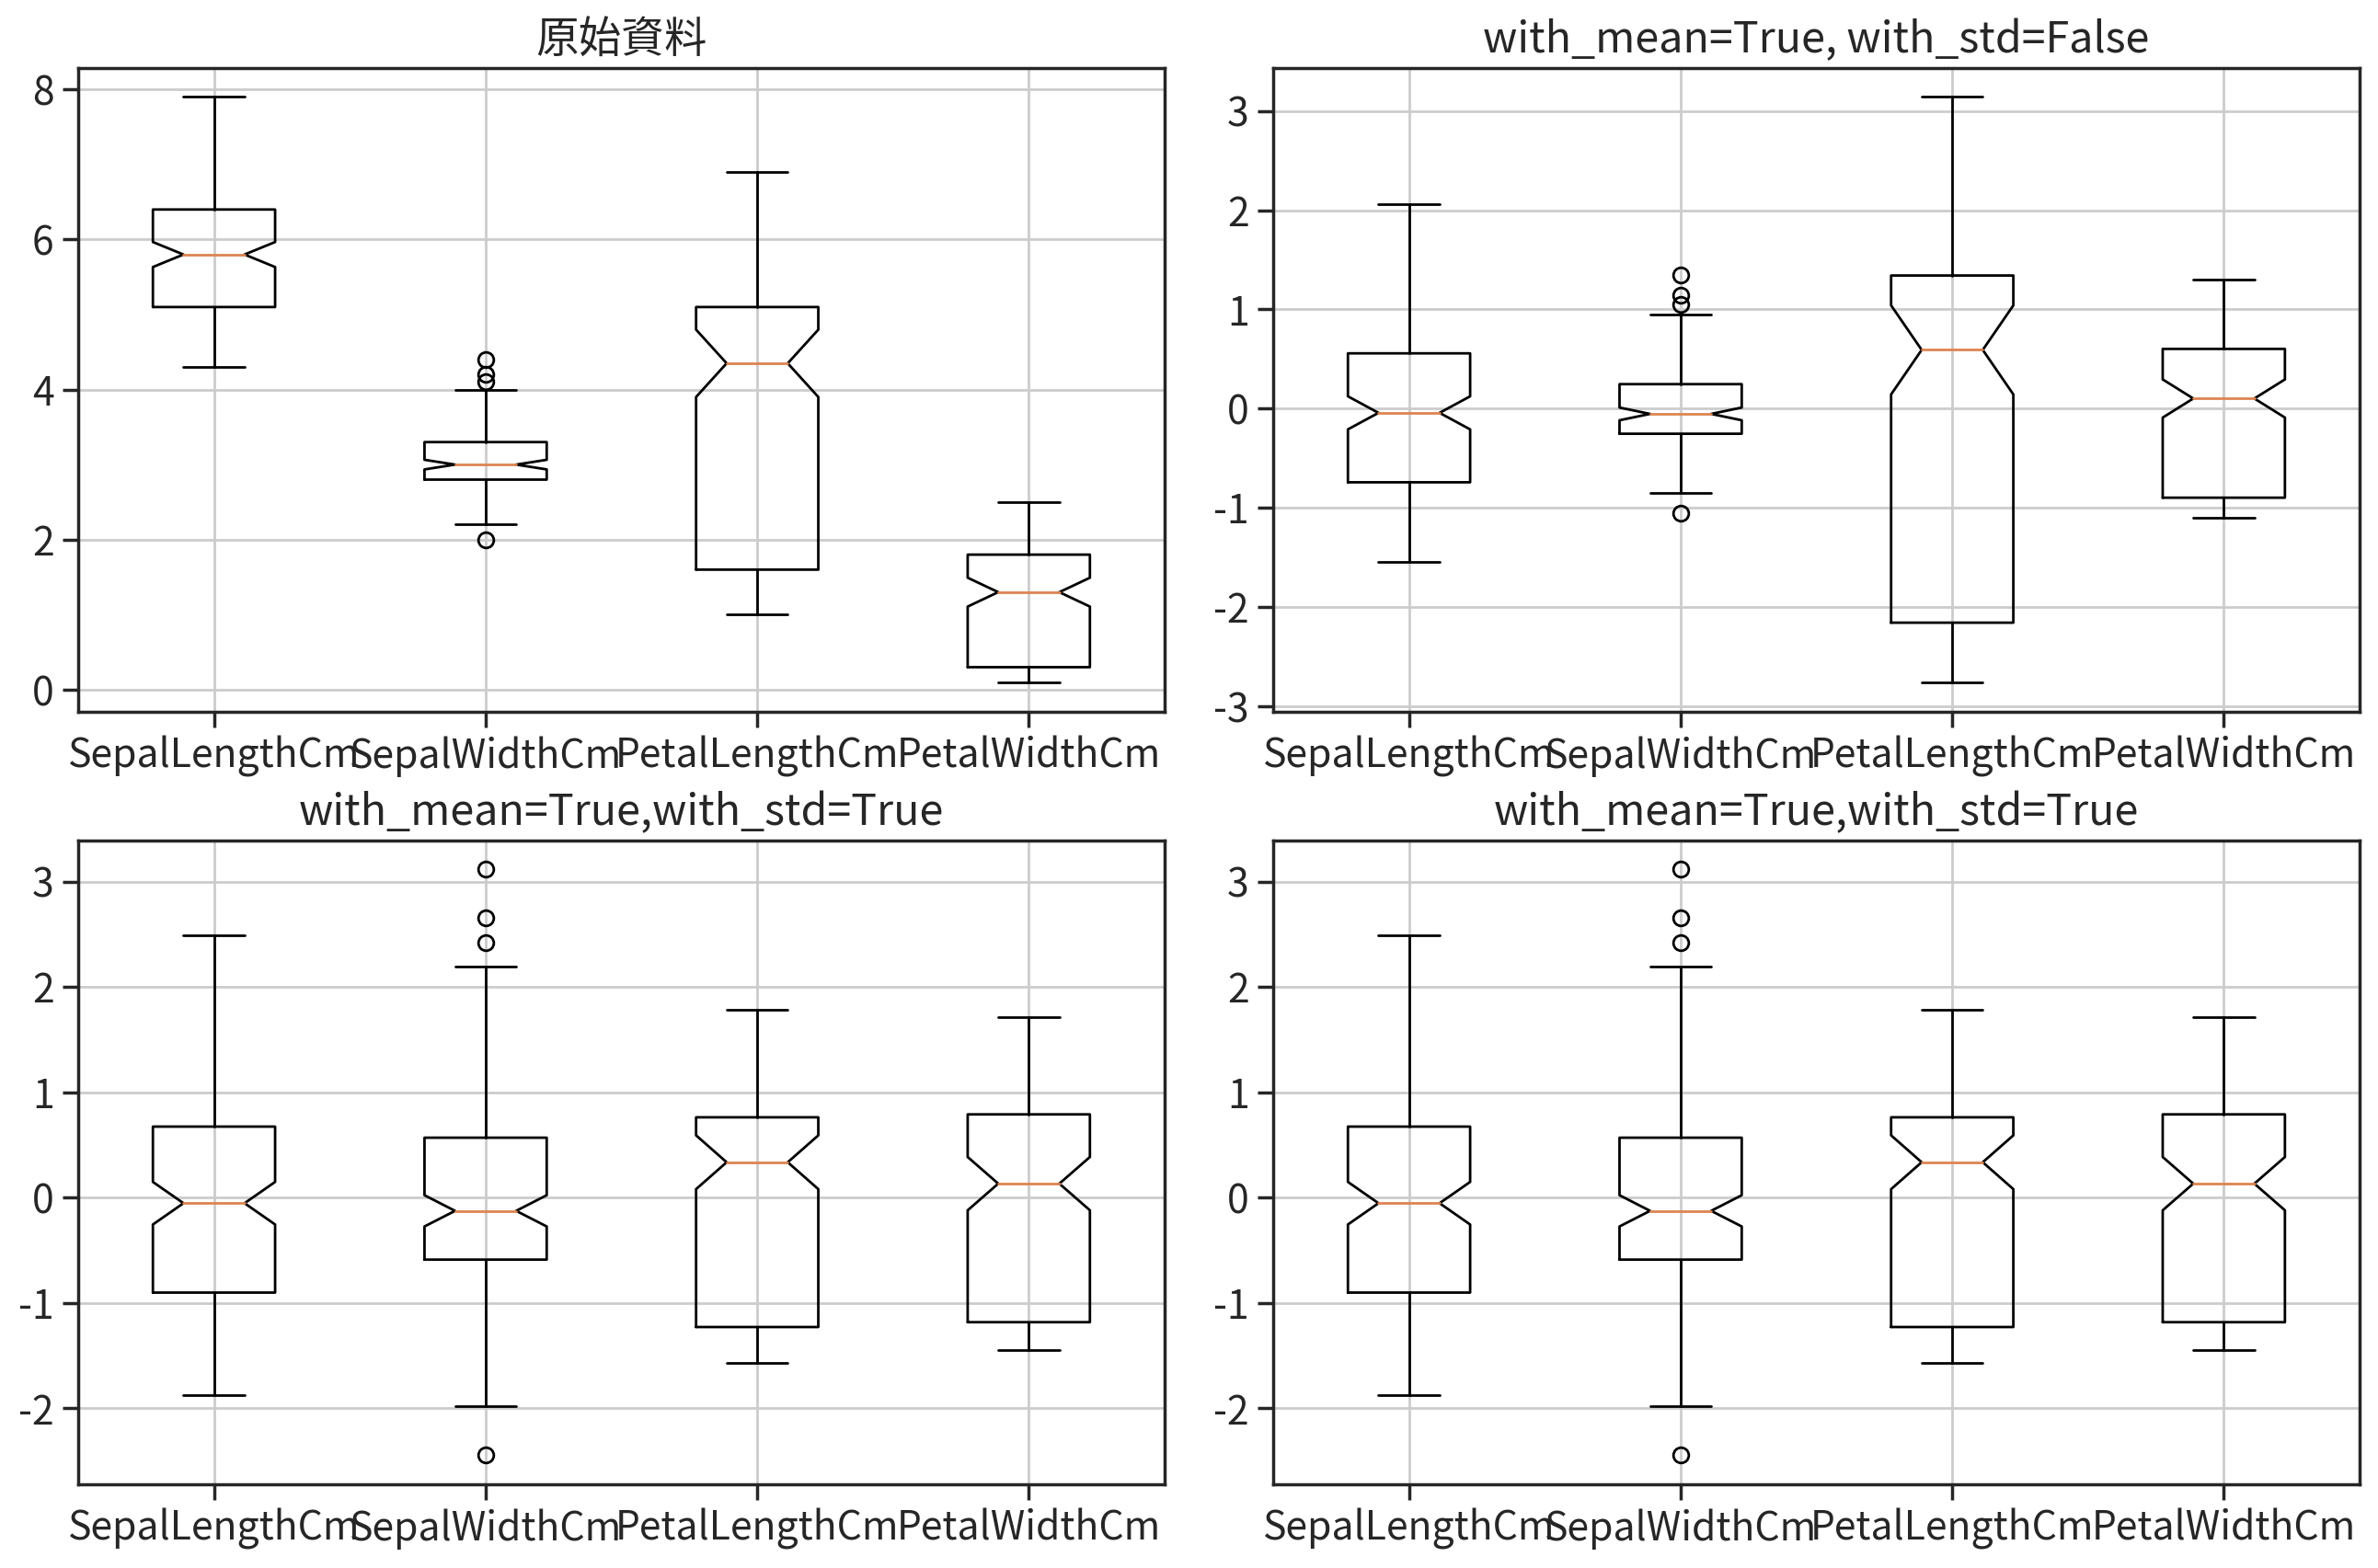

In [8]:
##將4個數值變數進行標準化,並視覺化標準化前後的資料變化情況

##只減去平均值

data_scale1=preprocessing.scale (Iris2, with_mean=True, with_std =False)

##減去平均值後除以標準差

data_scale2=preprocessing.scale(Iris2,with_mean=True, with_std=True)

##另一種減去平均值後除以標準差的方式

data_scale3=preprocessing.StandardScaler(with_mean=True, with_std=True).fit_transform(Iris2)

##視覺化原始資料和變換後的資料分佈

labs=Iris2.columns.values

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)

plt.boxplot(Iris2.values, notch=True, labels=labs)

plt.grid()

plt.title("原始資料")

plt.subplot(2,2,2)

plt.boxplot(data_scale1, notch=True, labels=labs)

plt.grid()

plt.title("with_mean=True, with_std=False")

plt.subplot(2,2,3)

plt.boxplot(data_scale2, notch=True, labels=labs)

plt.grid()

plt.title("with_mean=True,with_std=True")

plt.subplot(2,2,4)

plt.boxplot(data_scale3, notch=True, labels=labs)

plt.grid()

plt.title("with_mean=True,with_std=True")

plt.subplots_adjust(wspace=0.1)

plt.show()



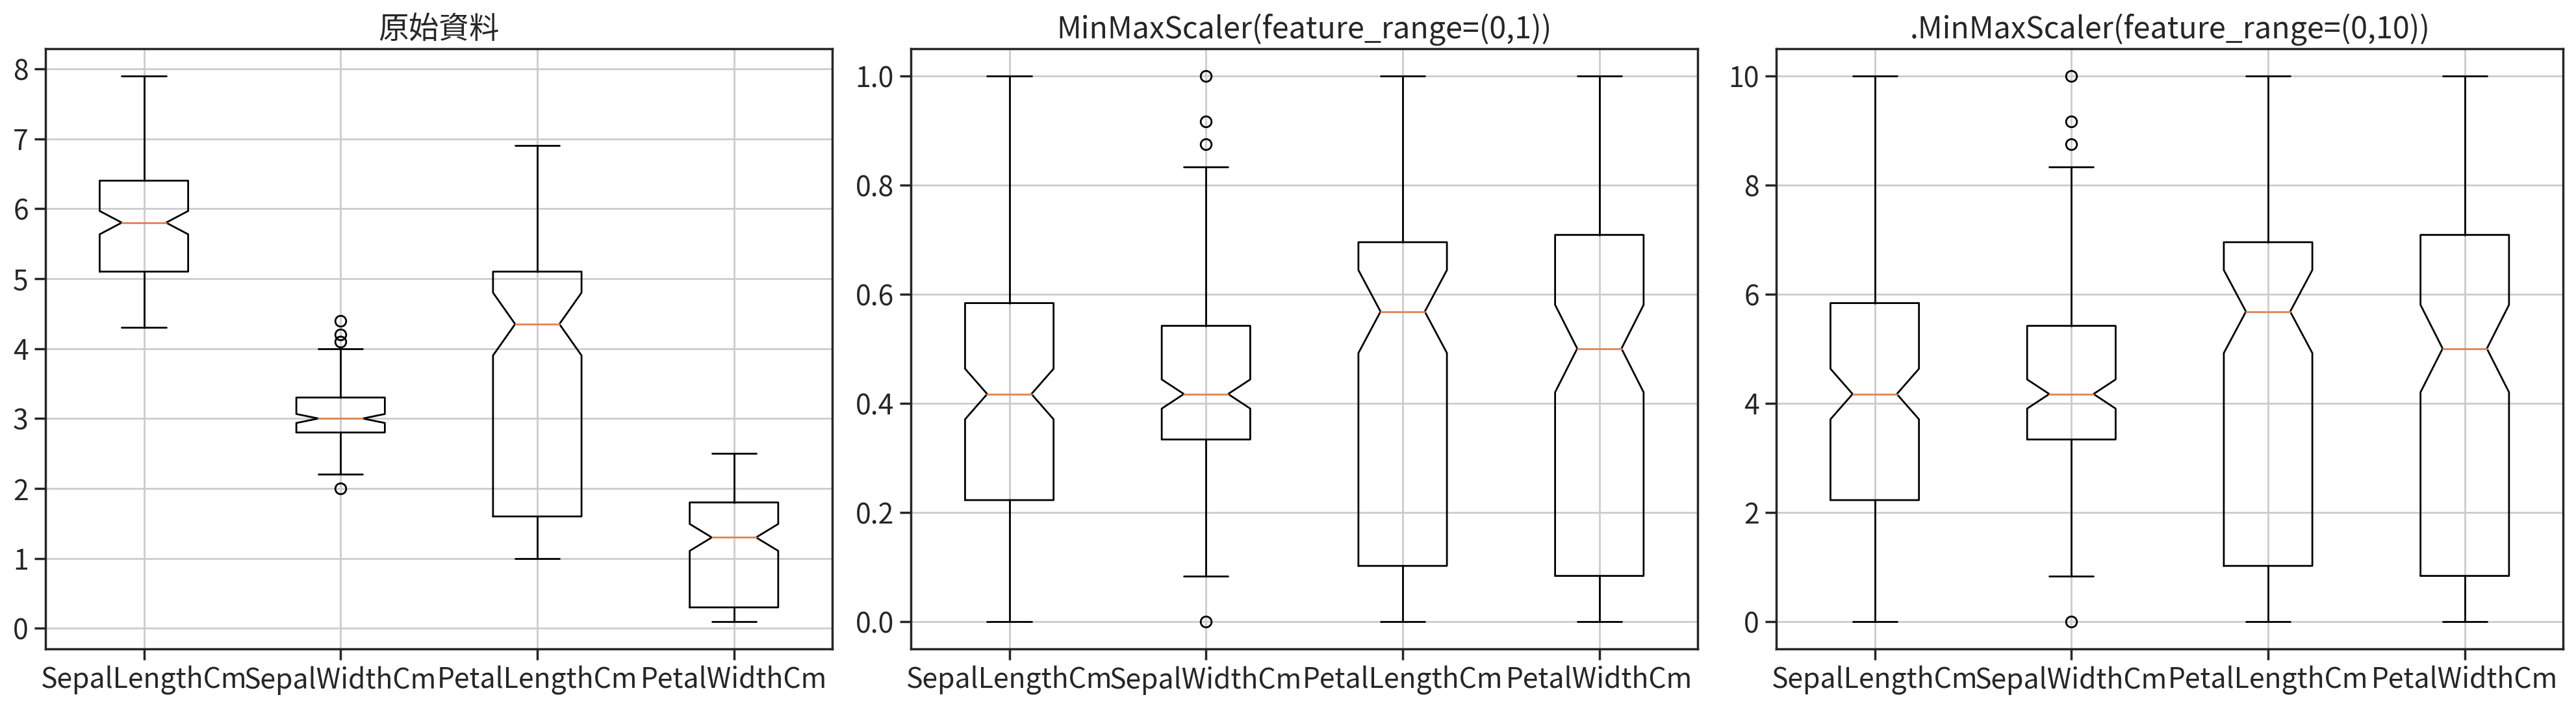

In [9]:
##將資料縮放到指定區間

data_minmax1=preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(Iris2)

data_minmax2=preprocessing.MinMaxScaler(feature_range=(0,10)).fit_transform(Iris2)

##視覺化資料縮放後的結果

labs=Iris2.columns.values

plt.figure(figsize=(25,6))

plt.subplot(1,3,1)

plt.boxplot(Iris2.values, notch=True, labels=labs)

plt.grid()

plt.title("原始資料")

plt.subplot(1,3,2)

plt.boxplot(data_minmax1, notch=True, labels=labs)

plt.grid()

plt.title("MinMaxScaler(feature_range=(0,1))")

plt.subplot(1,3,3)

plt.boxplot(data_minmax2, notch=True, labels=labs)

plt.grid()

plt.title(".MinMaxScaler(feature_range=(0,10))")

plt.subplots_adjust(wspace=0.1)

plt.show()



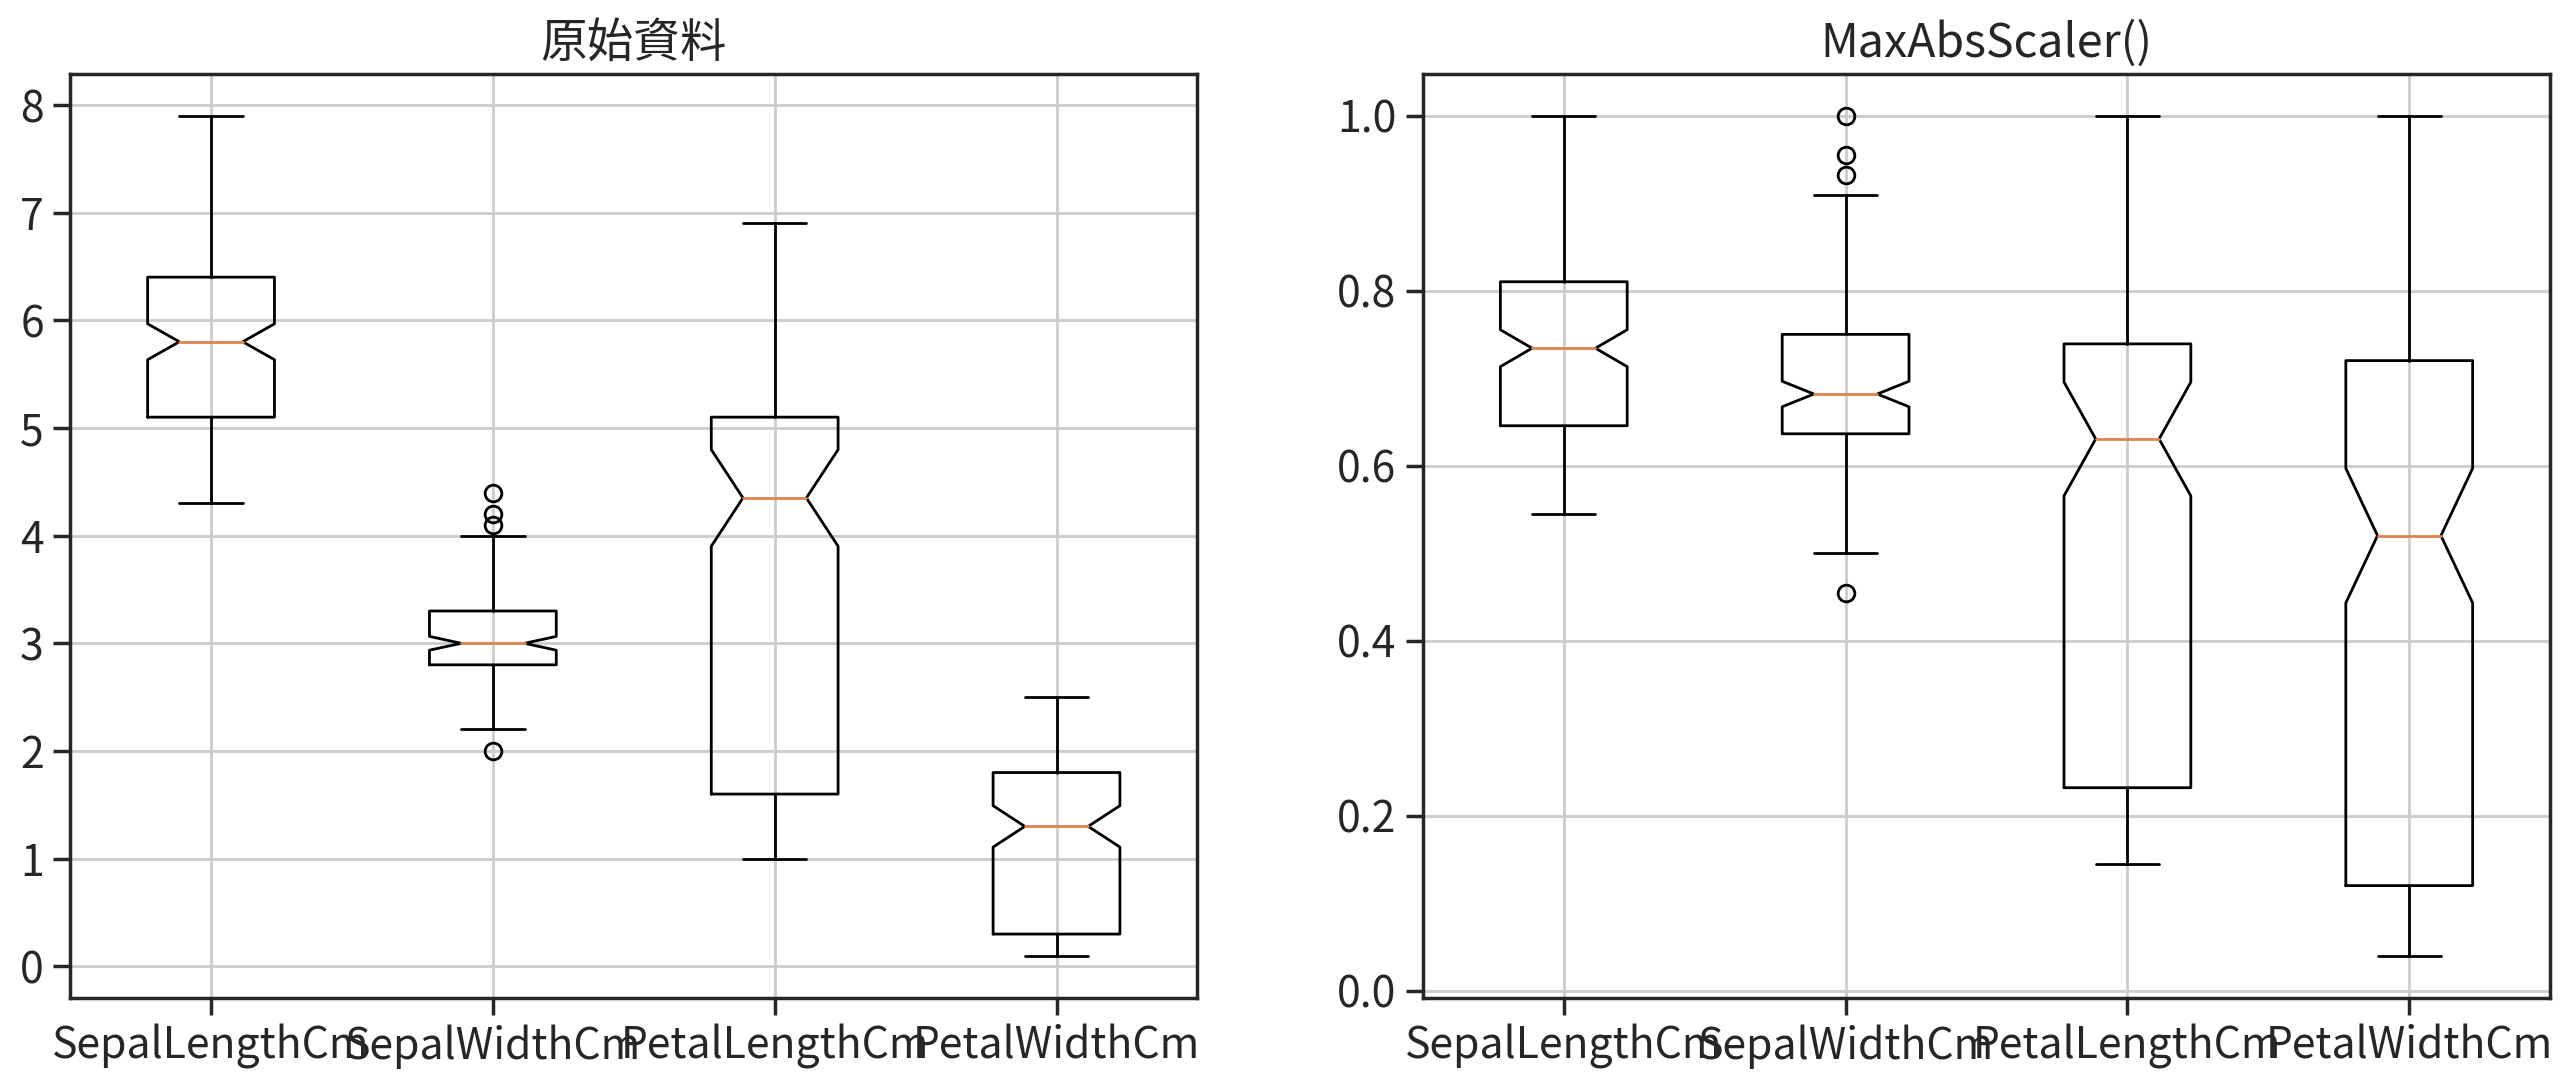

In [10]:
# 透過最大絕對值縮放每個特徵

data_maxabs=preprocessing.MaxAbsScaler().fit_transform(Iris2)

##使訓練集中每個特徵的最大絕對值為1.0,視覺化資料縮放後的結果

labs=Iris2.columns.values

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)

plt.boxplot(Iris2.values, notch=True, labels=labs)

plt.grid()

plt.title("原始資料")

plt.subplot(1,2,2)

plt.boxplot(data_maxabs, notch=True, labels=labs)

plt.grid()

plt.title("MaxAbsScaler()")

plt.show()


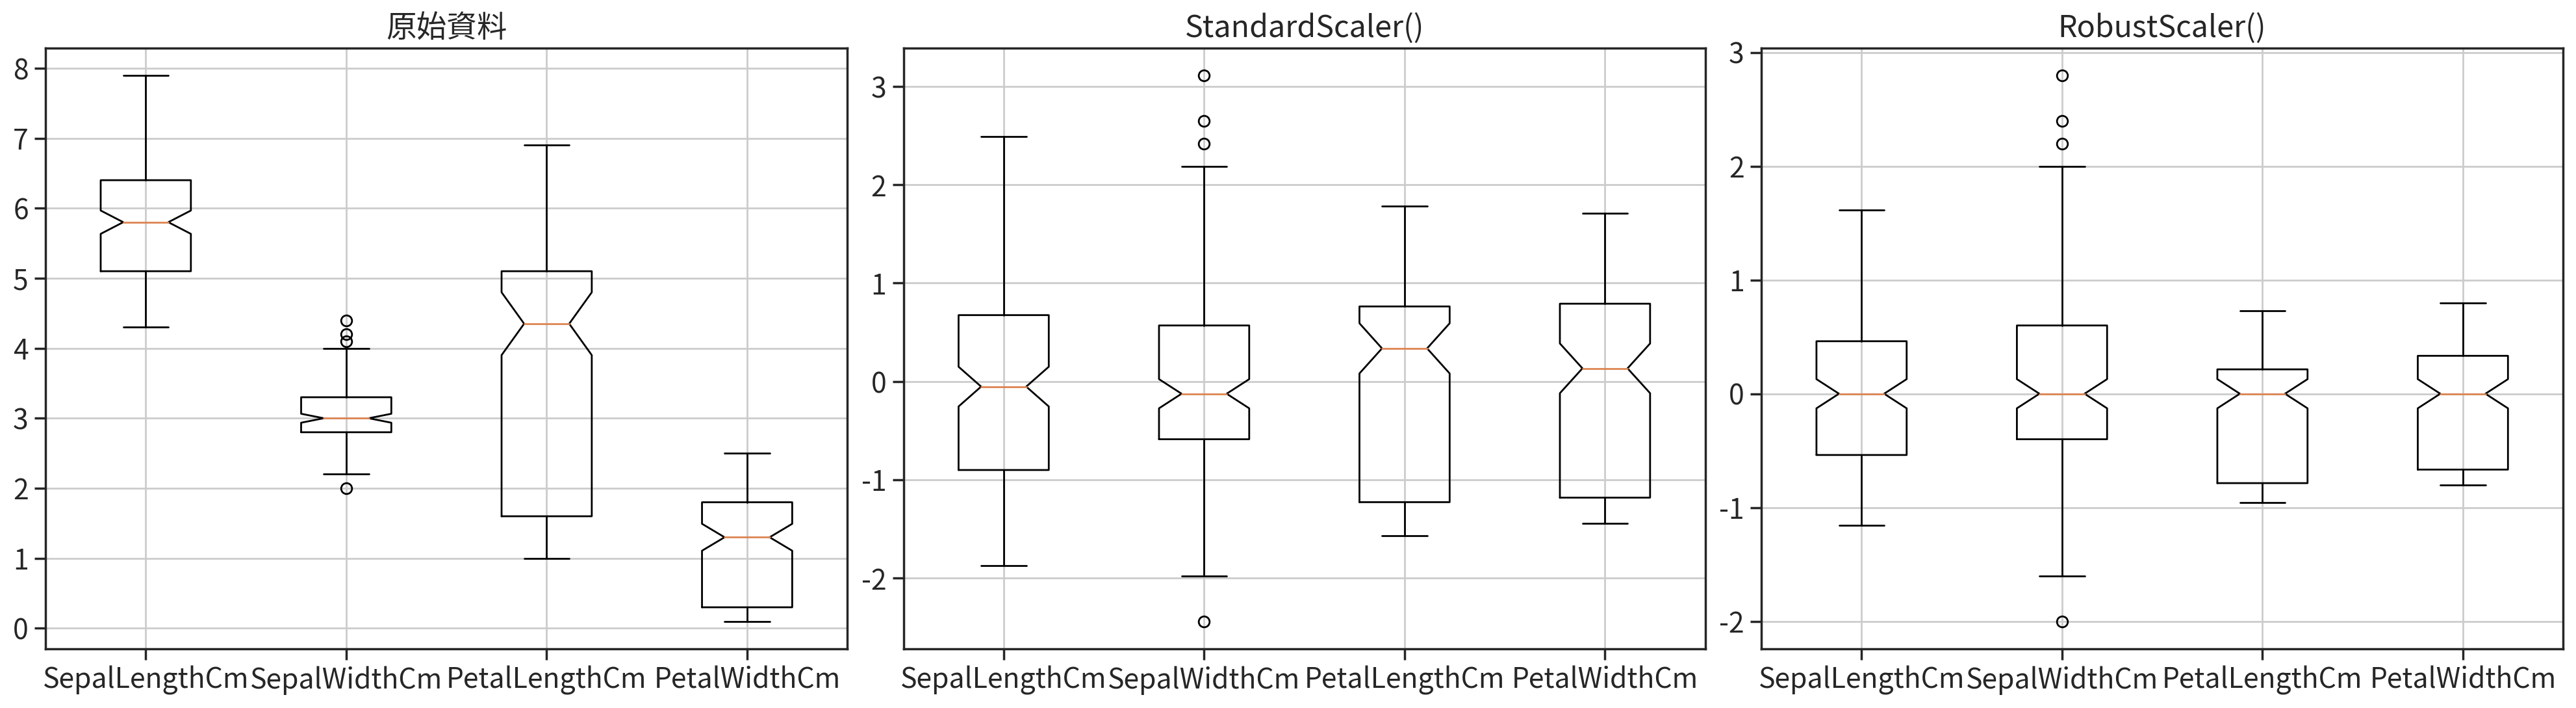

In [11]:
## 對帶有異常值的資料進行標準化

data_robs=preprocessing.RobustScaler (with_centering=True, with_scaling=True).fit_transform(Iris2)

##視覺化資料縮放後的結果

labs=Iris2.columns.values

plt.figure(figsize=(25,6))

plt.subplot(1,3,1)

plt.boxplot(Iris2.values, notch=True, labels=labs)

plt.grid()

plt.title("原始資料")

plt.subplot(1,3,2)

plt.boxplot(data_scale2, notch=True, labels=labs)

plt.grid()

plt.title("StandardScaler()")

plt.subplot(1,3,3)

plt.boxplot(data_robs, notch=True, labels=labs)

plt.grid()

plt.title("RobustScaler()")

plt.subplots_adjust(wspace=0.07)

plt.show()


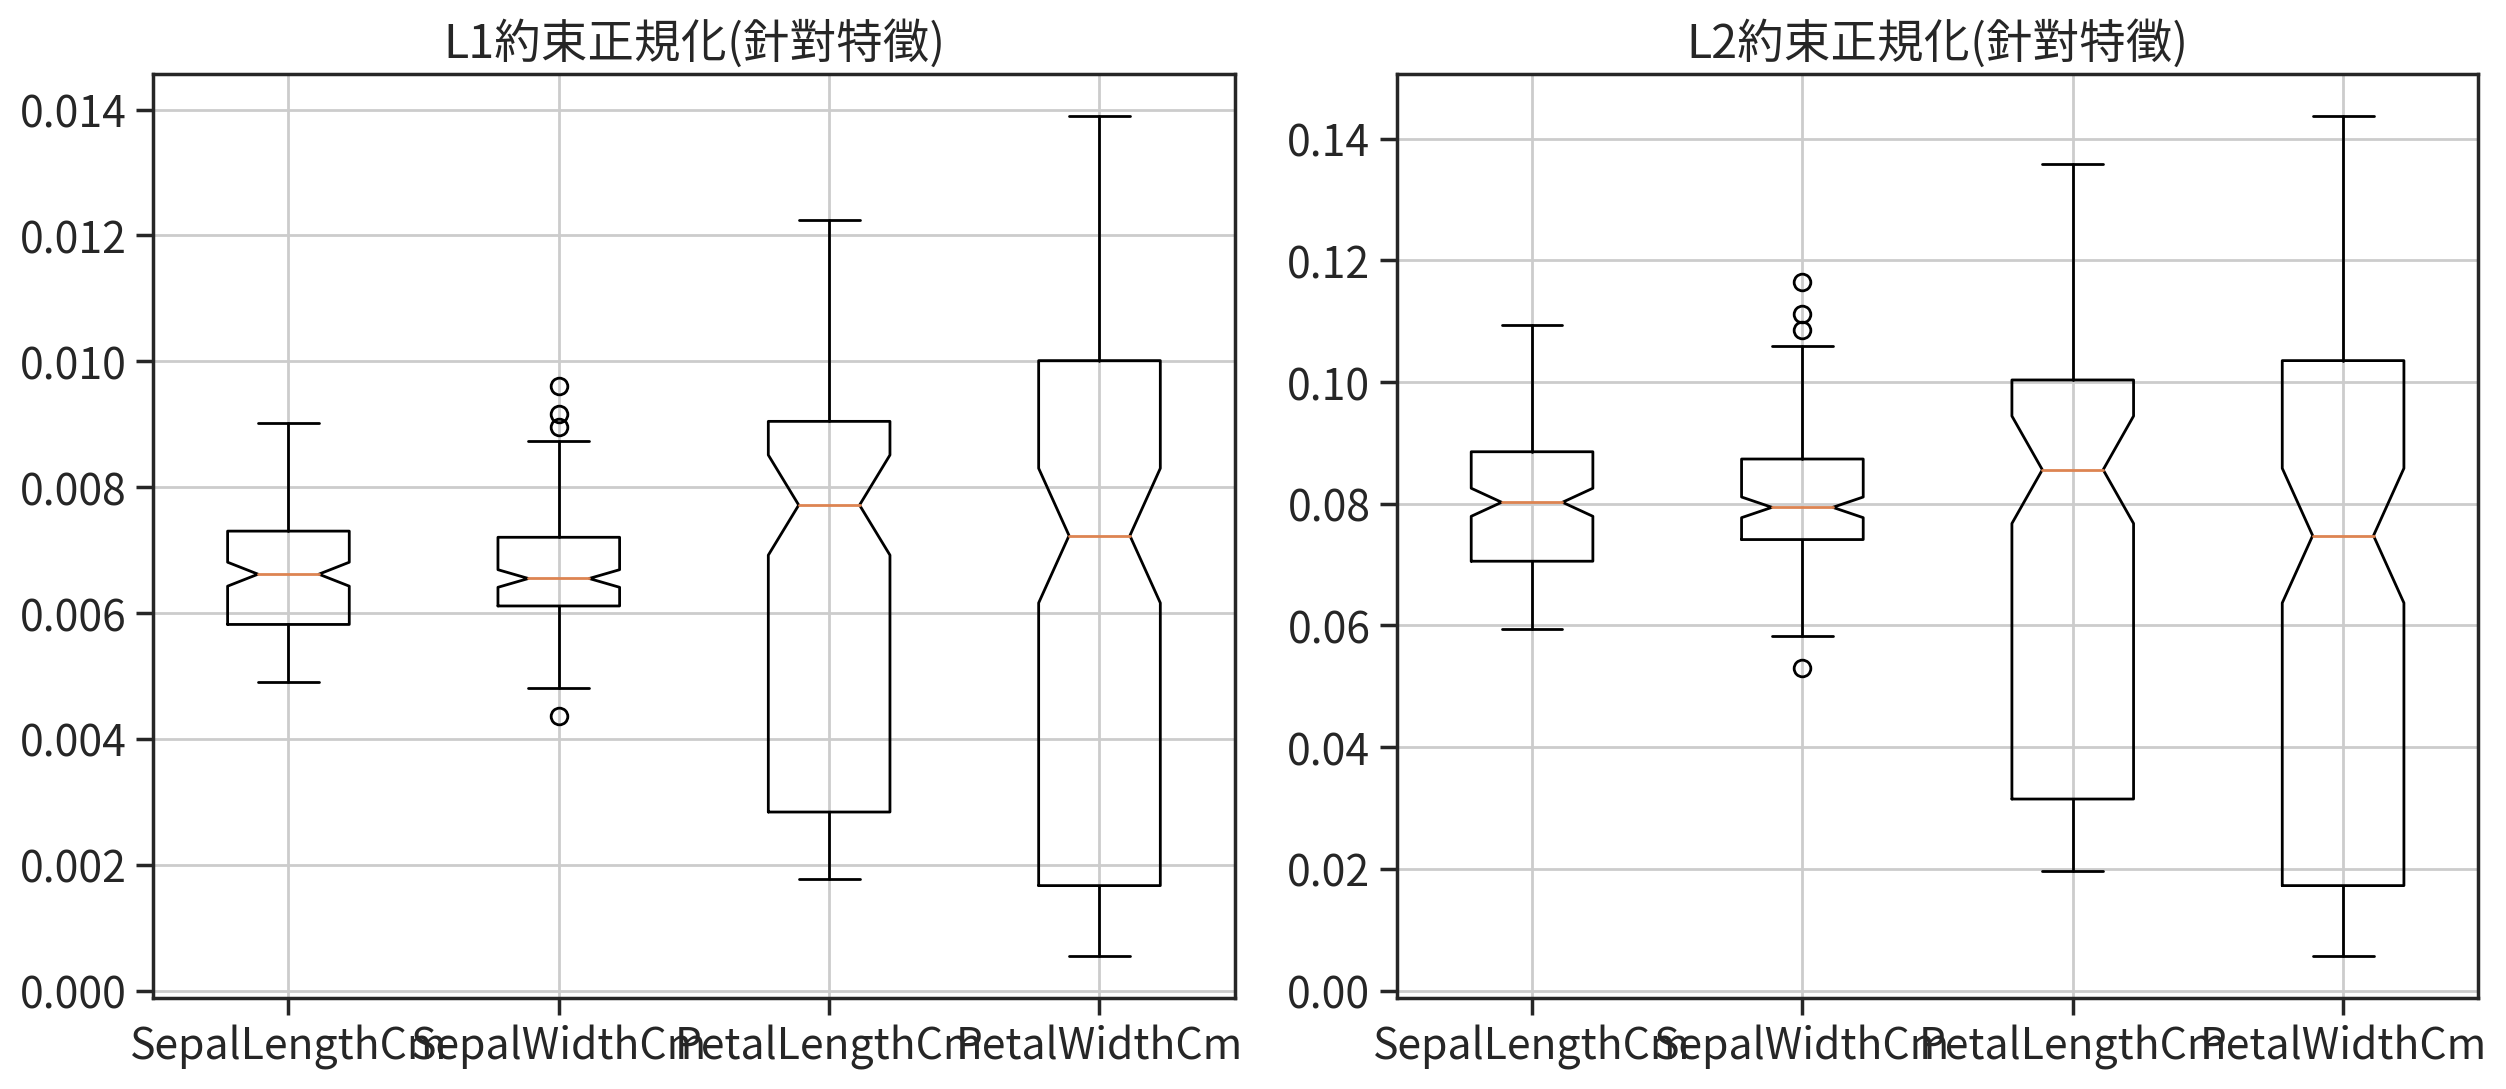

In [12]:
##正規化,axis=0表示針對特徵操作

data_normL1=preprocessing.normalize(Iris2, norm="l1", axis=0)

data_normL2=preprocessing.normalize(Iris2, norm="l2", axis=0)

## 視覺化資料縮放後的結果

labs=Iris2.columns.values

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)

plt.boxplot(data_normL1, notch=True, labels=labs)

plt.grid()

plt.title("L1約束正規化(針對特徵)")

plt.subplot(1,2,2)

plt.boxplot(data_normL2, notch=True, labels=labs)

plt.grid()

plt.title("L2約束正規化(針對特徵)")

plt.subplots_adjust(wspace=0.15)

plt.show()


In [ ]:
##正規化,axis=1表示針對每個樣本操作

data_normL1=preprocessing.normalize(Iris2, norm="l1", axis=1)
data_normL2=preprocessing.normalize(Iris2, norm="l2", axis=1)

##視覺化資料縮放後的結果

labs=Iris2.columns.values

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)

plt.boxplot(data_normL1, notch=True, labels=labs)

plt.grid()

plt.title("L1約束正規化(針對樣本)")

plt.subplot(1,2,2)

plt.boxplot(data_normL2, notch=True, labels=labs)

plt.grid()

plt.title("L2約束正規化(針對樣本)")

plt.subplots_adjust(wspace=0.15)

plt.show()


In [ ]:
## 對數變換

np.random.seed(12)

x=1+np.random.poisson(lam=1.5,size=5000)+np.random.rand(5000)

## 對x進行對數變換

lnx=np.log(x)

## 視覺化變換前後的資料分佈

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

plt.hist(x,bins=50)

plt.title("原始資料分佈")

plt.subplot(1,2,2)

plt.hist(lnx,bins=50)

plt.title("對數變換後資料分佈")

plt.show()


In [ ]:
## Box-Cox 變換:自動尋找最佳正態分佈變換函數的方法

from scipy.stats import boxcox

np.random.seed(12)

x = 1+np.random.poisson(lam=1.5,size=5000)+np.random.rand(5000)

##對x進行對數變換

bcx1=boxcox(x, lmbda=0)

bcx2=boxcox(x, lmbda=0.5)

bcx3=boxcox(x, lmbda=2)

bcx4=boxcox(x, lmbda=-1)

## 視覺化變換後的資料分佈

plt.figure (figsize= (14, 10) )

plt.subplot(2,2,1)

plt.hist(bcx1,bins=50)

plt.title ("$ln(x)$" )

plt.subplot(2,2,2)

plt.hist(bcx2,bins=50)

plt.title ("$\\sqrt{x}$")

plt.subplot(2,2,3)

plt.hist(bcx3,bins=50)

plt.title ("$x^2$" )

plt.subplot(2,2,4)

plt.hist(bcx4,bins=50)

plt.title("$ 1/x $")

plt.subplots_adjust(hspace=0.4)

plt.show()


In [ ]:
## 定義將資料變換為正態分佈的方法

QTn=preprocessing. QuantileTransformer(output_distribution= "normal", random_state=0)

## 對x進行對數變換,x要轉化為二維陣列

QTnx=QTn.fit_transform(x.reshape(5000,1))

## 視覺化變換前後的資料分佈

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

plt.hist(x,bins=50)

plt.title("原始資料分佈")

plt.subplot(1,2,2)

plt.hist(QTnx,bins=50)

plt.title("變換後資料分佈")

plt.show()


In [ ]:
## 連續變數分箱,使用鳶尾花資料展示 X=Iris.iloc[:,1:5].values n_bin=[2,3,4,5]
X= Iris.iloc [:,1:5].values
n_bin =[2,3,4,5]
Kbins=preprocessing.KBinsDiscretizer(n_bins=n_bin,#變數分別分為2,3,4,5份
encode="ordinal",#分箱後的特徵編碼為整數
strategy="quantile") ##利用分位數的分箱策略

X_Kbins=Kbins.fit_transform(X)

## 獲取劃分區間時的分界線

X_Kbins_edges=Kbins.bin_edges_ ##對分箱前後的資料進行視覺化

plt.figure(figsize=(16,8))

##視覺化分箱前的特徵

for ii in range(4):

    plt.subplot(2,4,ii+1)

    plt.hist(Iris.iloc[:,ii+1],bins=30)

    plt.title(Iris.columns[ii+1])

    ##視覺化分箱的分界線

    edges=X_Kbins_edges[ii]

    for edge in edges:

        plt.vlines (edge, 0, 25, colors="r", linewidth=3, linestyle='dashed')

## 視覺化分箱後的特徵

for ii,binsii in enumerate(n_bin):

    plt.subplot(2,4,ii+5)

    ## 計算每個元素出現的次數

    barx, height=np.unique(X_Kbins[:,ii], return_counts=True)

    plt.bar(barx, height)

plt.show()


In [ ]:
## 連續變數分箱,使用鳶尾花資料展示 X=Iris.iloc[:,1:5].values n_bin=[2,3,4,5]
X= Iris.iloc [:,1:5].values
n_bin =[2,3,4,5]
Kbins=preprocessing.KBinsDiscretizer(n_bins=n_bin,#變數分別分為2,3,4,5份
encode="ordinal",#分箱後的特徵編碼為整數
strategy="kmeans") ##利用k-means的分箱策略

X_Kbins=Kbins.fit_transform(X)

## 獲取劃分區間時的分界線

X_Kbins_edges=Kbins.bin_edges_ ##對分箱前後的資料進行視覺化

plt.figure(figsize=(16,8))

##視覺化分箱前的特徵

for ii in range(4):

    plt.subplot(2,4,ii+1)

    plt.hist(Iris.iloc[:,ii+1],bins=30)

    plt.title(Iris.columns[ii+1])

    ##視覺化分箱的分界線

    edges=X_Kbins_edges[ii]

    for edge in edges:

        plt.vlines (edge, 0, 25, colors="r", linewidth=3, linestyle='dashed')

## 視覺化分箱後的特徵

for ii,binsii in enumerate(n_bin):

    plt.subplot(2,4,ii+5)

    ## 計算每個元素出現的次數

    barx, height=np.unique(X_Kbins[:,ii], return_counts=True)

    plt.bar(barx, height)

plt.show()


In [ ]:
wine_x=pd.read_csv("wine_x.csv")
wine_y=pd.read_csv("wine_y.csv")
wine_y=list(wine_y.loc[:, 'label']) #取欄位名稱label的行為轉成list
print(wine_x.head())
print(wine_y)


In [ ]:
##剔除低方差的特徵

from sklearn.feature_selection import VarianceThreshold

VTH=VarianceThreshold(threshold=0.5)

VTH_wine_x=VTH.fit_transform(wine_x)

print(VTH_wine_x.shape)


In [ ]:
##保留的變數
VTH.variances_ >0.5

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

from sklearn.manifold import Isomap, MDS, TSNE

from sklearn.preprocessing import StandardScaler

## 對酒的特徵資料進行標準化

wine_x=StandardScaler().fit_transform(wine_x)

In [ ]:
##使用主成分分析對酒資料集進行降維

pca=PCA(n_components=13, random_state=123)

pca.fit(wine_x)

##視覺化主成分分析的解釋方差得分

exvar=pca.explained_variance_

plt.figure(figsize=(10,6))

plt.plot(exvar, "r-o")

plt.hlines(y=1, xmin=0, xmax=12)

plt.xlabel("特徵數量")

plt.ylabel("解釋方差大小")

plt.title("主成分分析")

plt.show()


In [ ]:
##可以發現使用資料的前3個主成分較合適

pca_wine_x=pca.transform(wine_x) [:,0:3]

print(pca_wine_x.shape)

## 在3D空間中視覺化主成分分析後的資料空間分佈

colors=["red","blue","green"]

shapes=["o","s","*"]

fig=plt.figure(figsize=(20,14.7))

## 將座標系設定為3D座標系

ax1=fig.add_subplot(111, projection="3d")

for ii,y in enumerate (wine_y):

    ax1.scatter(pca_wine_x[ii,0],pca_wine_x[ii, 1],pca_wine_x [ii,2], s=40, c=colors[y], marker=shapes[y])

ax1.set_xlabel("主成分1", rotation=20)

ax1.set_ylabel("主成分2", rotation=-20)

ax1.set_zlabel("主成分3", rotation=90)

ax1.azim=225

ax1.set_title("主成分特徵空間視覺化")

plt.show()


In [ ]:
## TSNE進行資料降維,降維到三維(3D)空間

tsne=TSNE(n_components=3, perplexity =30, early_exaggeration =3, random_state=125 ,learning_rate=10 ,init="random")

## 獲取降維後的資料

tsne_wine_x=tsne.fit_transform(wine_x)

## 在3D空間中視覺化t-SNE分析後的資料空間分佈

colors=["red","blue","green"]

shapes=["o","s","*"]

fig=plt.figure(figsize=(20,14.7))

## 將座標系設定為3D座標系

ax1=fig.add_subplot(111, projection="3d")

for ii,y in enumerate (wine_y):

    ax1.scatter(tsne_wine_x[ii,0],tsne_wine_x[ii, 1],tsne_wine_x[ii,2], s=40, c=colors[y], marker=shapes[y])

ax1.set_xlabel("特徵1", rotation=20)

ax1.set_ylabel("特徵2", rotation=-20)

ax1.set_zlabel("特徵3", rotation=90)

ax1.azim=225

ax1.set_title("TSNE降維視覺化")

plt.show()